## 9.3 주성분 분석

### 9.3.1 주성분 분석

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sample = np.random.RandomState(1)

In [3]:
X = np.dot(sample.rand(2,2), sample.randn(2, 200)).T

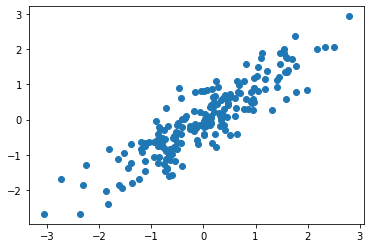

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)
print(''.format(sp.stats.pearsonr(X_std[:, 0], X_std[:,1])[0]))
plt.scatter(X_std[:,0], X_std[:,1])

#### 주성분 분석 실행

In [5]:
pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [6]:
print(pca.components_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [7]:
print(pca.explained_variance_)

[1.89888438 0.11116588]


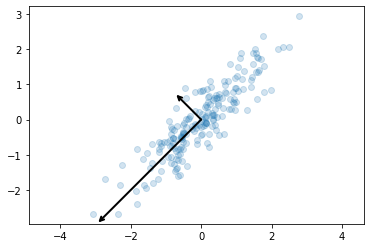

In [8]:
arrowprops=dict(arrowstyle='->',linewidth=2, shrinkA=0, shrinkB=0)

def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) 
    draw_vector(pca.mean_, pca.mean_ + v)
    plt.axis('equal');

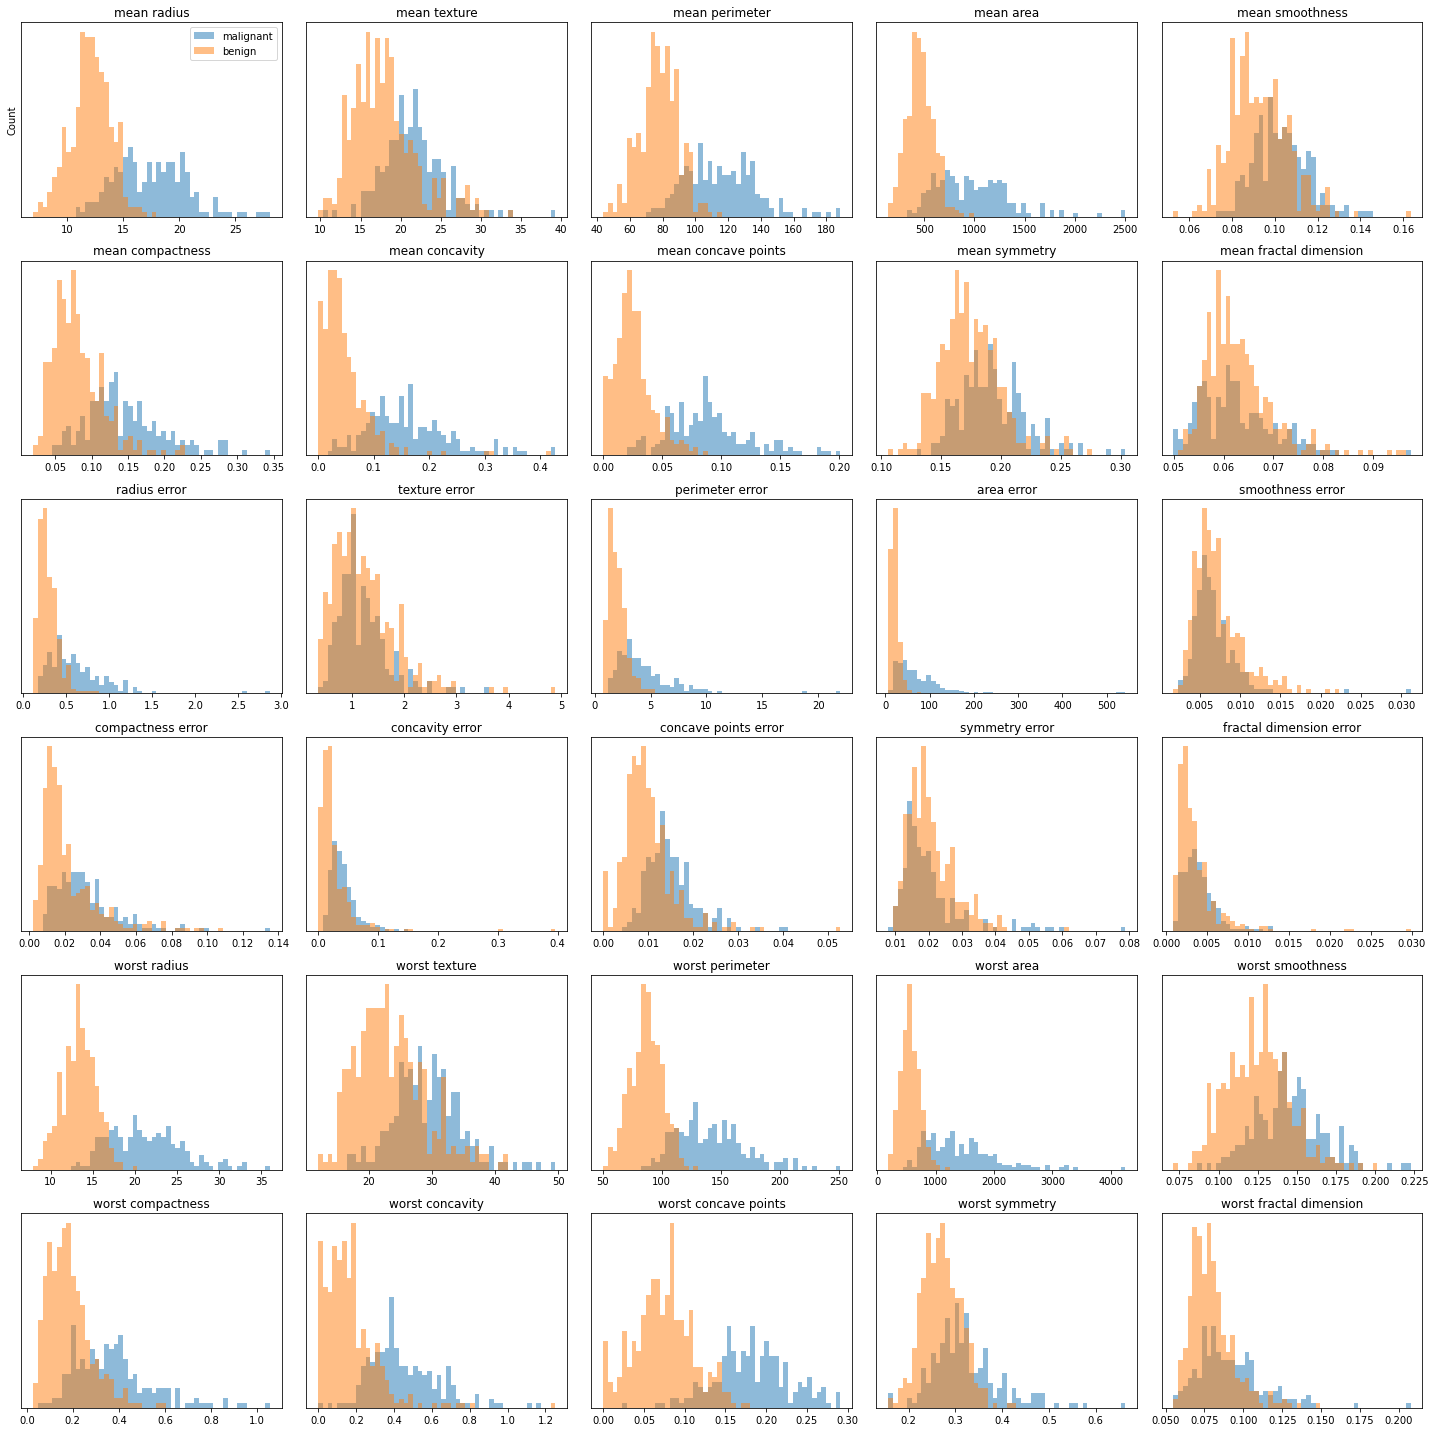

In [9]:
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5) 
    ax[i].set_title(cancer.feature_names[i]) 
    ax[i].set_yticks(())
    
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [10]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

In [11]:
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

In [12]:
print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.44272026 0.18971182]


In [18]:
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

In [20]:
X_pca

,pc1,pc2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


In [18]:
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

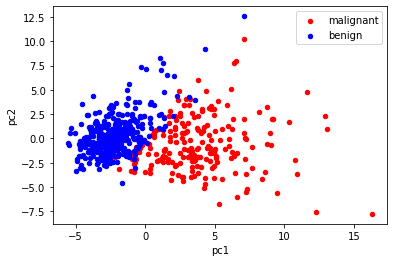

In [19]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);